In [66]:
# Importiere die notwendigen Bibliotheken
import pandas as pd
from tabulate import tabulate
import math
import seaborn as sns
import matplotlib.pyplot as plt

# 1. Lese die CSV-Datei ein
# Ersetze 'sails_results.csv' durch den Pfad zu deiner CSV-Datei
df = pd.read_csv('sa_ls_results_10000.csv')


# Round 'RunTime' to the nearest integer
df['RunTime'] = df['RunTime'].round(2).astype(int)

# Convert 'WaitingTime' to integers as it only has whole numbers
df['WaitingTime'] = df['WaitingTime'].astype(int)

# Rename specific columns
df = df.rename(columns={
    'min_temperature': 'End Temperature',
    'temp_decrease_factor': 'Decrease Factor',
    'start_temperature': 'Start Temperature',
    # Add more columns to rename as needed
})

#table = tabulate(df, headers='keys', tablefmt='pretty', showindex=False)
df.head(3)

,Instance,Start Temperature,End Temperature,Decrease Factor,TotalProfit,WaitingTime,TotalTasks,Iterations,RunTime,TimeLimit,IterationsMax
0,7_2_1,100,1.000000e-20,0.95,762,3530,272,121,900,900,10000
1,7_2_1,100,1.000000e-20,0.99,761,3879,272,24,915,900,10000
2,7_2_1,100,1.000000e-40,0.95,765,3675,272,75,903,900,10000


##### Calculale RPD

In [67]:
#Find the maximum 'TotalProfit' for each 'Instance'
max_profit_per_instance = df.groupby('Instance')['TotalProfit'].transform('max')

# Calculate RPD
df['RPD'] = ((max_profit_per_instance - df['TotalProfit']) / max_profit_per_instance) * 100

# Function to calculate iterations based on start temperature, min temperature, and temp decrease factor
def calculate_iterations(T_start, T_min, alpha):
    # Check if alpha is less than 1 to avoid errors
    if alpha < 1:
        iterations = math.log(T_min / T_start) / math.log(alpha)
        return int(iterations)
    else:
        return None  # Return None or handle cases where alpha is not less than 1

# Apply the formula to each row of the DataFrame
df['SA_Runs'] = df.apply(
    lambda row: calculate_iterations(row['Start Temperature'], row['End Temperature'], row['Decrease Factor']), axis=1)

In [68]:
df

,Instance,Start Temperature,End Temperature,Decrease Factor,TotalProfit,WaitingTime,TotalTasks,Iterations,RunTime,TimeLimit,IterationsMax,RPD,SA_Runs
0,7_2_1,100,1.000000e-20,0.95,762,3530,272,121,900,900,10000,1.677419,987
1,7_2_1,100,1.000000e-20,0.99,761,3879,272,24,915,900,10000,1.806452,5040
2,7_2_1,100,1.000000e-40,0.95,765,3675,272,75,903,900,10000,1.290323,1885
3,7_2_1,100,1.000000e-40,0.99,762,3407,272,15,958,900,10000,1.677419,9622
4,7_2_1,1000,1.000000e-20,0.95,775,2691,275,83,905,900,10000,0.000000,1032
...,...,...,...,...,...,...,...,...,...,...,...,...,...
76,7_8_1,10000,1.000000e-10,0.90,2168,9040,932,784,902,900,10000,0.459137,305
77,7_8_1,10000,1.000000e-10,0.95,2166,10140,934,288,900,900,10000,0.550964,628
78,7_8_1,10000,1.000000e-10,0.99,2150,16009,918,16,1004,900,10000,1.285583,3207
79,7_8_1,10000,1.000000e-20,0.90,2169,10371,938,448,902,900,10000,0.413223,524


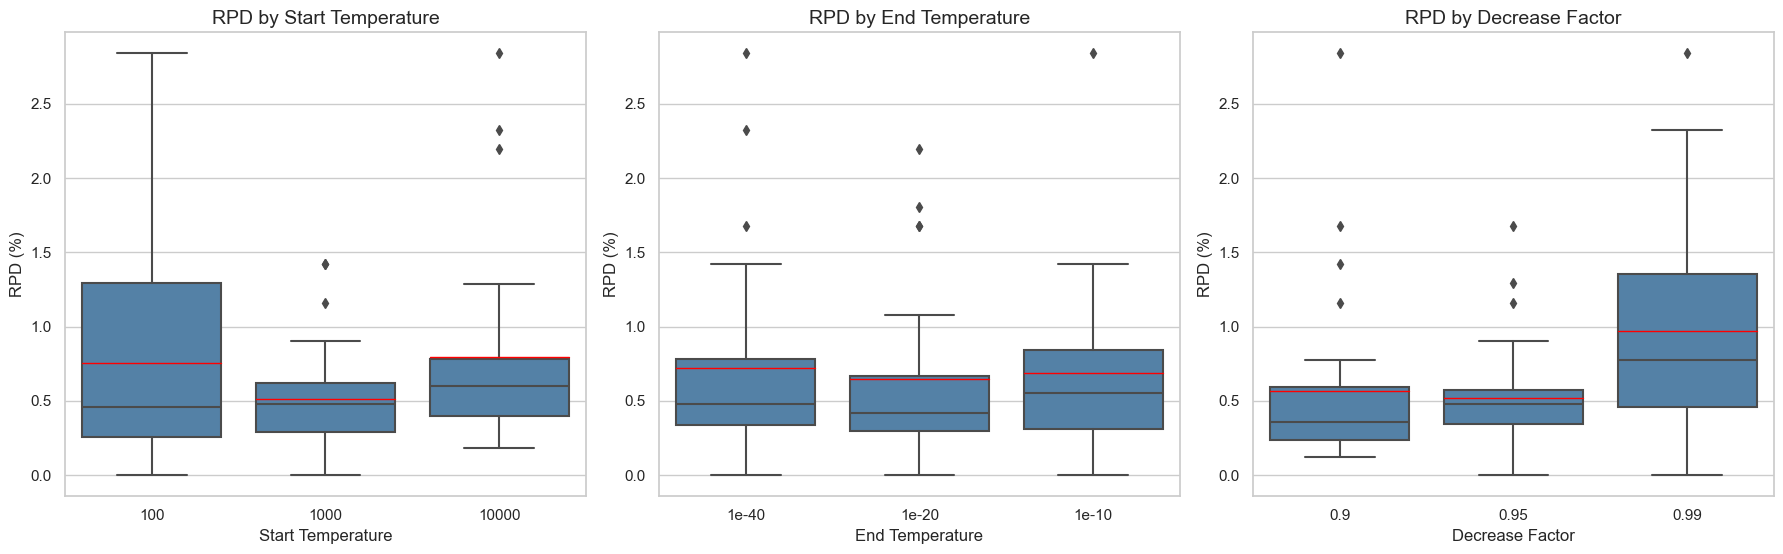

In [69]:
#Assuming 'df' is your DataFrame with the calculated RPD

# Set global plot style to serif font
plt.rcParams["font.family"] = "serif"

# Set seaborn style for whitegrid (can adjust to suit scientific purposes)
sns.set(style="whitegrid")

# Parameters to plot
parameters = ['Start Temperature', 'End Temperature', 'Decrease Factor']

# Set a consistent color for all box plots
boxplot_color = "steelblue"

# Create subplots - one for each parameter
fig, axes = plt.subplots(1, len(parameters), figsize=(18, 6))

# Loop through the parameters and create boxplots in subplots
for i, param in enumerate(parameters):
    sns.boxplot(x=param, y='RPD', data=df, showmeans=True, meanline=True,
                meanprops={"color": "red", "ls": "-", "lw": 1},
                color=boxplot_color, ax=axes[i])  # Set consistent color
    
    # Set titles for each subplot
    axes[i].set_title(f'RPD by {param}', fontsize=14)
    axes[i].set_xlabel(param, fontsize=12)
    axes[i].set_ylabel('RPD (%)', fontsize=12)

# Adjust the layout to make space for the overall title
plt.tight_layout(rect=[0, 0, 1, 0.95])

# Save the figure as a PNG file
plt.savefig('rpd_box_plots_scientific.png', dpi=300)  # Save with high dpi for quality

# Show the plot
plt.show()

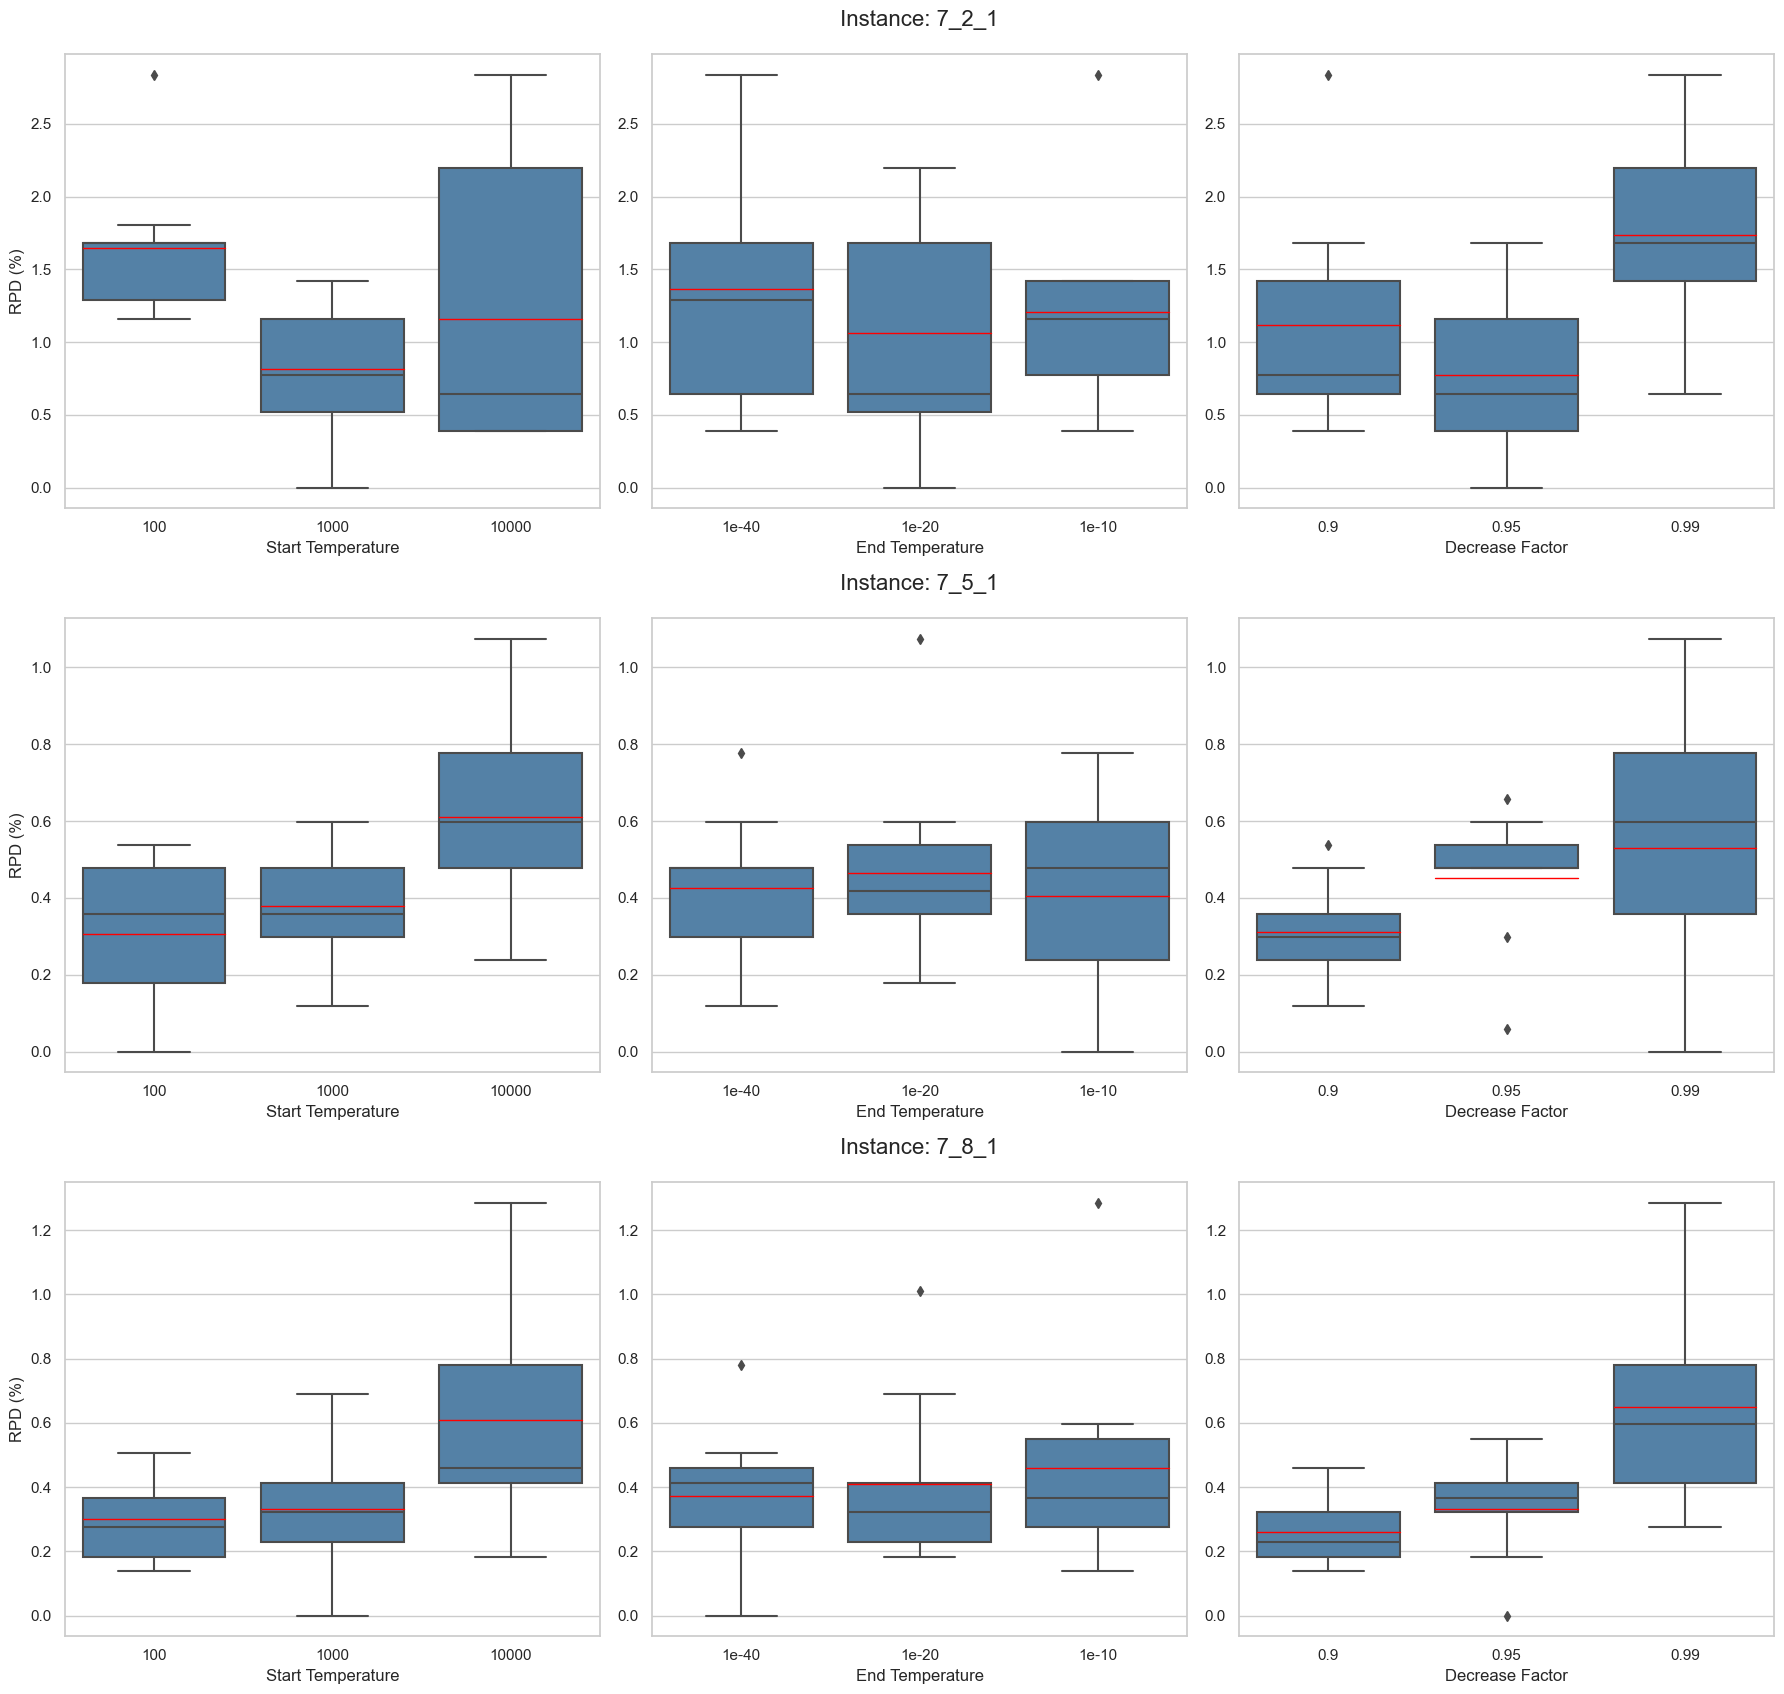

In [71]:
# Assuming 'df' is your DataFrame with the calculated RPD

# Set global plot style to serif font
plt.rcParams["font.family"] = "serif"

# Set seaborn style for whitegrid (can adjust to suit scientific purposes)
sns.set(style="whitegrid")

# Parameters to plot
parameters = ['Start Temperature', 'End Temperature', 'Decrease Factor']

# List of instances
instances = df['Instance'].unique()

# Set a consistent color for all box plots
boxplot_color = "steelblue"

# Create subplots - we want a 3x3 grid (3 rows for each instance, 3 columns for each parameter)
fig, axes = plt.subplots(len(instances), len(parameters), figsize=(18, 18))

# Loop through the instances and parameters to create boxplots in subplots
for row, instance in enumerate(instances):
    # Filter the dataframe for the current instance
    instance_df = df[df['Instance'] == instance]
    
    # Add a header above the row for the instance (on the first plot in each row)
    axes[row, 1].set_title(f'Instance: {instance}', fontsize=16, pad=20)

    for col, param in enumerate(parameters):
        sns.boxplot(x=param, y='RPD', data=instance_df, showmeans=True, meanline=True,
                    meanprops={"color": "red", "ls": "-", "lw": 1},
                    color=boxplot_color, ax=axes[row, col])  # Set consistent color
        
        # Set axis labels for each subplot
        axes[row, col].set_xlabel(param, fontsize=12)
        
        # Only set ylabel for the first column of each row to avoid repetition
        if col == 0:
            axes[row, col].set_ylabel('RPD (%)', fontsize=12)
        else:
            axes[row, col].set_ylabel('')

# Adjust the layout to make space for the instance headers and overall formatting
plt.tight_layout(rect=[0, 0, 1, 0.95])

# Save the figure as a PNG file
plt.savefig('rpd_box_plots_by_instance.png', dpi=300)  # Save with high dpi for quality

# Show the plot
plt.show()


In [85]:
# Assuming your dataframe is called df
# We group by relevant parameters and filter for unique 'SA_Runs'

# Group by the parameter columns and find unique SA_Runs
unique_combinations = df.drop_duplicates(subset=['Start Temperature', 'End Temperature', 'Decrease Factor', 'SA_Runs'])

# Show the unique combinations with distinct 'SA_Runs'
print(unique_combinations[['Start Temperature', 'End Temperature', 'Decrease Factor', 'SA_Runs']])

    Start Temperature  End Temperature  Decrease Factor  SA_Runs
0                 100     1.000000e-20             0.95      987
1                 100     1.000000e-20             0.99     5040
2                 100     1.000000e-40             0.95     1885
3                 100     1.000000e-40             0.99     9622
4                1000     1.000000e-20             0.95     1032
5                1000     1.000000e-20             0.99     5269
6                1000     1.000000e-40             0.95     1930
7                1000     1.000000e-40             0.99     9851
8               10000     1.000000e-20             0.95     1077
9               10000     1.000000e-20             0.99     5498
10              10000     1.000000e-40             0.95     1975
11              10000     1.000000e-40             0.99    10080
36                100     1.000000e-10             0.90      262
37                100     1.000000e-10             0.95      538
38                100    